<ipython-input-4-dd9b88497b50>:25: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  suppressed = feature.peak_local_max(magnitude, footprint=np.ones((3, 3)), indices=False)


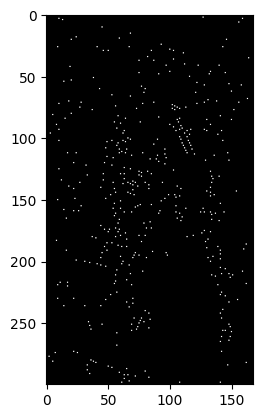

In [4]:
# canny edge detection algorithm
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io, color, feature, img_as_float, filters

img = io.imread('eg.jpeg')
if len(img.shape) == 3:
  img = color.rgb2gray(img)
img = img_as_float(img)

sigma=1.0
low_threshold=0.1
high_threshold=0.2

smoothed = ndimage.gaussian_filter(img, sigma)

# Step 2: Compute gradient magnitude and direction
gx = ndimage.sobel(smoothed, axis=0)
gy = ndimage.sobel(smoothed, axis=1)
magnitude = np.hypot(gx, gy)
direction = np.arctan2(gy, gx)

# Step 3: Non-maximum suppression
suppressed = feature.peak_local_max(magnitude, footprint=np.ones((3, 3)), indices=False)
suppressed = suppressed * magnitude

# Step 4: Double thresholding
low_mask = suppressed > low_threshold
high_mask = suppressed > high_threshold

# Step 5: Edge tracking by hysteresis
edges = filters.apply_hysteresis_threshold(suppressed, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')